In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

fashion = pd.read_csv("C:/Users/gayus/OneDrive/Desktop/Master Course/NDSC/fashion_data_info_train_competition.csv")
fashion_test = pd.read_csv("C:/Users/gayus/OneDrive/Desktop/Master Course/NDSC/fashion_data_info_val_competition.csv")
fashion.shape

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(275142, 8)

In [2]:
fashion.head()

,itemid,title,image_path,Pattern,Collar Type,Fashion Trend,Clothing Material,Sleeves
0,2282553,retro floral dress,fashion_image/78d17fdb159bba51a4250dc3d583245e,2.0,NaN,3.0,NaN,NaN
1,13822218,dress floral sifon,fashion_image/2f77dac9965bbfdb03cbd3724b3552c5,2.0,NaN,NaN,4.0,NaN
2,33555935,korean white chiffon collar dress,fashion_image/6dbe2e7cba5ddbb750d2144d8f248f11,NaN,13.0,10.0,4.0,NaN
3,65755120,women s trendy apricot o neck solid chiffon bl...,fashion_image/dc9b21429604148fc0342d12694f3294,NaN,3.0,NaN,4.0,NaN
4,65857438,big sale baju gamis pesta india aysilla pancar...,fashion_image/6c25c578dd8edce742a805f891f1a51f,NaN,NaN,6.0,17.0,NaN


# 1. Pattern

In [3]:
pa = ['title', 'Pattern']
fashion_pa = fashion[pa]

#remove missing values
fashion_pa = fashion_pa[pd.notnull(fashion_pa['Pattern'])]
fashion_pa = fashion_pa[['title', 'Pattern']].sort_values('Pattern')
fashion_pa_id = dict(fashion_pa.values)
fashion_pa.shape

(164078, 2)

In [4]:
fashion_pa.head()

,title,Pattern
117926,promo blouse batik paisley renda putih wanita ...,0.0
248047,promo ppk161217 paisley blouse jumbo katun ray...,0.0
176523,grosir muqgew hot sale attractive women s fash...,0.0
218780,new product seen 04a botanical paisley kemeja ...,0.0
162458,paisley blouse bigsize baju atasan wanita blus...,0.0


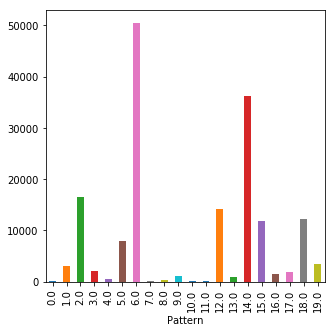

Pattern
0.0       100
1.0      2984
2.0     16500
3.0      2111
4.0       466
5.0      7830
6.0     50506
7.0       112
8.0       372
9.0      1091
10.0       55
11.0      120
12.0    14145
13.0      911
14.0    36178
15.0    11880
16.0     1419
17.0     1781
18.0    12125
19.0     3392
Name: title, dtype: int64

In [5]:
fig = plt.figure(figsize = (5,5))
fashion_pa.groupby(['Pattern'])['title'].count().plot.bar(ylim = 0)
plt.show()
fashion_pa.groupby('Pattern')['title'].count()

In [6]:
#MultinomialNB

y = fashion_pa['Pattern']
X = fashion_pa['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.86
#low accuracy and recall for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.94
#high accuracy and recall for minority group (better than Random Forest)

#RandomForestClassifier
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.91
#high accuracy and recall for minority group  

#Conclusion: LinearSVC and Random Forest are good but linearSVC has higher accuracy and recall for minority group.

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        40
        1.0       0.80      0.71      0.75      1201
        2.0       0.74      0.85      0.79      6625
        3.0       0.73      0.44      0.55       837
        4.0       1.00      0.09      0.17       158
        5.0       0.89      0.80      0.84      3069
        6.0       0.92      0.95      0.94     20072
        7.0       1.00      0.02      0.04        47
        8.0       1.00      0.02      0.04       155
        9.0       1.00      0.26      0.42       443
       10.0       0.00      0.00      0.00        24
       11.0       0.00      0.00      0.00        41
       12.0       0.92      0.91      0.91      5728
       13.0       1.00      0.12      0.21       374
       14.0       0.82      0.95      0.88     14563
       15.0       0.92      0.97      0.95      4759
       16.0       0.81      0.49      0.61       586
       17.0       0.98      0.

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC
             precision    recall  f1-score   support

        0.0       0.95      0.90      0.92        40
        1.0       0.94      0.93      0.93      1201
        2.0       0.90      0.90      0.90      6625
        3.0       0.93      0.87      0.90       837
        4.0       0.93      0.85      0.89       158
        5.0       0.91      0.85      0.88      3069
        6.0       0.98      0.97      0.97     20072
        7.0       1.00      0.98      0.99        47
        8.0       0.94      0.88      0.91       155
        9.0       0.87      0.94      0.90       443
       10.0       0.94      0.67      0.78        24
       11.0       0.89      0.80      0.85        41
       12.0       0.96      0.96      0.96      5728
       13.0       0.95      0.90      0.92       374
       14.0       0.98      0.96      0.97     14563
       15.0       0.98      0.98      0.98      4759
       16.0       0.93      0.84      0.88       586
       17.0       0.96      0.90   

In [7]:
A = fashion_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Pattern'}, axis='columns')
fashion_test_1=pd.concat([fashion_test, new_1], axis=1)
fashion_test_1

,itemid,title,image_path,Pattern
0,381034175,fashion wanita cardigan drape terbuka lengan p...,new_fashion_image/9ba6bf09ae89c2b9069faf569e7a...,5.0
1,396355150,bayar di tempat fashion wanita fg sweater hood...,new_fashion_image/f465cd2e55352e3ed9ab49b16257...,6.0
2,592583745,bayar di tempat cardigan sweater model lengan ...,new_fashion_image/18d709b8be0d8385689bbf5e0ab2...,6.0
3,721929368,blazer lengan panjang slim warna polos dengan ...,new_fashion_image/5c861844f6e497f0a56b8e37138c...,6.0
4,800794259,sweater rajut longgar lengan panjang warna polos,new_fashion_image/13fbe2dcbaa567939acf708d6d8e...,6.0
5,959172548,blazer kerah lapel lengan panjang dengan saku ...,new_fashion_image/3ca9d6f525ae21e0a966b63fae5c...,18.0
6,962038495,jaket lace lengan panjang slim motif bunga unt...,new_fashion_image/ae812b232c3c7fdde11505cf534a...,2.0
7,1029774483,eileen elisa sexy tombol sweater wanita pullov...,new_fashion_image/b4fd3bc71c0ebd90c977100715f5...,18.0
8,1067777027,bayar di tempat kaos t shirt dengan hoodie dan...,new_fashion_image/275e82c90f97aee1912cf64a597c...,14.0
9,1270302483,sweater kaos pullover crew neck lengan panjang...,new_fashion_image/2d8de1e482ac11ba44a3f3818bf9...,18.0


# 2. Collar Type

In [8]:
ct = ['title', 'Collar Type']
fashion_ct = fashion[ct]

#remove missing values
fashion_ct = fashion_ct[pd.notnull(fashion_ct['Collar Type'])]
fashion_ct = fashion_ct[['title', 'Collar Type']].sort_values('Collar Type')
fashion_ct_id = dict(fashion_ct.values)
fashion_ct.shape

(113638, 2)

In [9]:
fashion_ct.head()

,title,Collar Type
240777,kemeja wanita lengan panjang model slim tipis ...,0.0
11044,wanita mencetak a line dresses lapel vintage d...,0.0
96867,new 34026 black green lapel strap dress party,0.0
242818,kemeja wanita dengan model kerah lapel lengan ...,0.0
23459,sexy hollow out lace patchwork tassels bodycon...,0.0


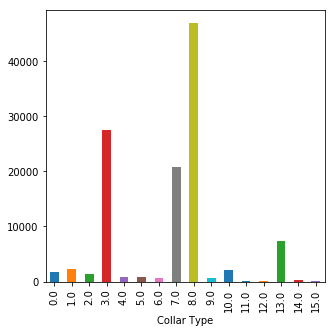

Collar Type
0.0      1723
1.0      2270
2.0      1395
3.0     27494
4.0       898
5.0       775
6.0       629
7.0     20737
8.0     47013
9.0       671
10.0     2101
11.0      138
12.0       90
13.0     7351
14.0      207
15.0      146
Name: title, dtype: int64

In [10]:
fig = plt.figure(figsize = (5,5))
fashion_ct.groupby(['Collar Type'])['title'].count().plot.bar(ylim = 0)
plt.show()
fashion_ct.groupby('Collar Type')['title'].count()

In [11]:
#MultinomialNB

y = fashion_ct['Collar Type']
X = fashion_ct['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.75
#low accuracy and recall for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.83
#high accuracy and recall for minority group (better than Random Forest)

#RandomForestClassifier
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.82
#low accuracy and recall for minority group  

#Conclusion: linearSVC has higher accuracy and recall for minority group.

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.86      0.56      0.68       692
        1.0       0.66      0.61      0.63       930
        2.0       0.82      0.27      0.41       533
        3.0       0.62      0.59      0.60     10956
        4.0       0.98      0.61      0.75       380
        5.0       0.83      0.05      0.09       308
        6.0       0.41      0.10      0.16       236
        7.0       0.96      0.96      0.96      8195
        8.0       0.72      0.81      0.76     18897
        9.0       0.98      0.61      0.76       270
       10.0       0.88      0.49      0.63       837
       11.0       0.00      0.00      0.00        55
       12.0       0.00      0.00      0.00        38
       13.0       0.83      0.88      0.86      2980
       14.0       1.00      0.11      0.20        81
       15.0       0.00      0.00      0.00        68

avg / total       0.75      0.75      0.74     45456
 



C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC
             precision    recall  f1-score   support

        0.0       0.90      0.78      0.84       692
        1.0       0.92      0.86      0.89       930
        2.0       0.94      0.94      0.94       533
        3.0       0.69      0.62      0.66     10956
        4.0       0.98      0.84      0.90       380
        5.0       0.95      0.62      0.75       308
        6.0       0.95      0.89      0.92       236
        7.0       0.99      0.96      0.98      8195
        8.0       0.78      0.87      0.82     18897
        9.0       0.96      0.87      0.91       270
       10.0       0.96      0.80      0.87       837
       11.0       0.93      0.96      0.95        55
       12.0       0.75      0.32      0.44        38
       13.0       0.97      0.93      0.95      2980
       14.0       0.96      0.85      0.90        81
       15.0       0.96      0.74      0.83        68

avg / total       0.83      0.83      0.82     45456
 

Random Forest Classifier
      

In [12]:
A = fashion_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Collar Type'}, axis='columns')
fashion_test_2=pd.concat([fashion_test_1, new_1], axis=1)
fashion_test_2

,itemid,title,image_path,Pattern,Collar Type
0,381034175,fashion wanita cardigan drape terbuka lengan p...,new_fashion_image/9ba6bf09ae89c2b9069faf569e7a...,5.0,8.0
1,396355150,bayar di tempat fashion wanita fg sweater hood...,new_fashion_image/f465cd2e55352e3ed9ab49b16257...,6.0,1.0
2,592583745,bayar di tempat cardigan sweater model lengan ...,new_fashion_image/18d709b8be0d8385689bbf5e0ab2...,6.0,8.0
3,721929368,blazer lengan panjang slim warna polos dengan ...,new_fashion_image/5c861844f6e497f0a56b8e37138c...,6.0,8.0
4,800794259,sweater rajut longgar lengan panjang warna polos,new_fashion_image/13fbe2dcbaa567939acf708d6d8e...,6.0,3.0
5,959172548,blazer kerah lapel lengan panjang dengan saku ...,new_fashion_image/3ca9d6f525ae21e0a966b63fae5c...,18.0,0.0
6,962038495,jaket lace lengan panjang slim motif bunga unt...,new_fashion_image/ae812b232c3c7fdde11505cf534a...,2.0,3.0
7,1029774483,eileen elisa sexy tombol sweater wanita pullov...,new_fashion_image/b4fd3bc71c0ebd90c977100715f5...,18.0,8.0
8,1067777027,bayar di tempat kaos t shirt dengan hoodie dan...,new_fashion_image/275e82c90f97aee1912cf64a597c...,14.0,1.0
9,1270302483,sweater kaos pullover crew neck lengan panjang...,new_fashion_image/2d8de1e482ac11ba44a3f3818bf9...,18.0,3.0


# 3. Fashion Trend

In [13]:
ft = ['title', 'Fashion Trend']
fashion_ft = fashion[ft]

#remove missing values
fashion_ft = fashion_ft[pd.notnull(fashion_ft['Fashion Trend'])]
fashion_ft = fashion_ft[['title', 'Fashion Trend']].sort_values('Fashion Trend')
fashion_ft_id = dict(fashion_ft.values)
fashion_ft.shape

(147084, 2)

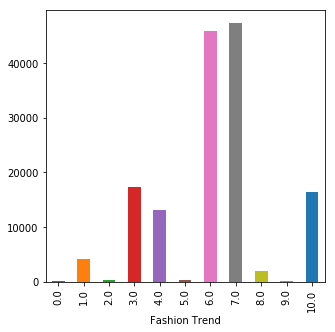

Fashion Trend
0.0        49
1.0      4226
2.0       375
3.0     17335
4.0     13177
5.0       247
6.0     45828
7.0     47305
8.0      1986
9.0       148
10.0    16408
Name: title, dtype: int64

In [14]:
fig = plt.figure(figsize = (5,5))
fashion_ft.groupby(['Fashion Trend'])['title'].count().plot.bar(ylim = 0)
plt.show()
fashion_ft.groupby('Fashion Trend')['title'].count()

In [15]:
#MultinomialNB

y = fashion_ft['Fashion Trend']
X = fashion_ft['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.86
#low accuracy and recall for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.92
#high accuracy and recall for minority group (better than Random Forest)

#RandomForestClassifier
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.91
#high accuracy and recall for minority group  

#Conclusion: linearSVC and RandomForest have comparable accuracy but LinearSCV has higher recall for minority group.

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        21
        1.0       0.91      0.55      0.68      1732
        2.0       1.00      0.20      0.33       158
        3.0       0.78      0.91      0.84      6900
        4.0       0.89      0.88      0.89      5268
        5.0       1.00      0.03      0.06        94
        6.0       0.95      0.84      0.89     18122
        7.0       0.82      0.96      0.88     19119
        8.0       1.00      0.47      0.64       826
        9.0       1.00      0.01      0.03        71
       10.0       0.81      0.68      0.74      6523

avg / total       0.86      0.86      0.85     58834
 



C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC
             precision    recall  f1-score   support

        0.0       0.67      0.19      0.30        21
        1.0       0.90      0.70      0.79      1732
        2.0       0.99      0.88      0.93       158
        3.0       0.99      0.93      0.96      6900
        4.0       0.98      0.92      0.95      5268
        5.0       0.85      0.61      0.71        94
        6.0       0.90      0.93      0.91     18122
        7.0       0.93      0.93      0.93     19119
        8.0       0.96      0.88      0.92       826
        9.0       1.00      0.86      0.92        71
       10.0       0.82      0.89      0.86      6523

avg / total       0.92      0.92      0.92     58834
 

Random Forest Classifier
             precision    recall  f1-score   support

        0.0       0.11      0.05      0.07        21
        1.0       0.86      0.71      0.78      1732
        2.0       0.99      0.80      0.88       158
        3.0       0.92      0.92      0.92      6900
     

In [16]:
A = fashion_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Fashion Trend'}, axis='columns')
fashion_test_3=pd.concat([fashion_test_2, new_1], axis=1)
fashion_test_3

,itemid,title,image_path,Pattern,Collar Type,Fashion Trend
0,381034175,fashion wanita cardigan drape terbuka lengan p...,new_fashion_image/9ba6bf09ae89c2b9069faf569e7a...,5.0,8.0,6.0
1,396355150,bayar di tempat fashion wanita fg sweater hood...,new_fashion_image/f465cd2e55352e3ed9ab49b16257...,6.0,1.0,7.0
2,592583745,bayar di tempat cardigan sweater model lengan ...,new_fashion_image/18d709b8be0d8385689bbf5e0ab2...,6.0,8.0,10.0
3,721929368,blazer lengan panjang slim warna polos dengan ...,new_fashion_image/5c861844f6e497f0a56b8e37138c...,6.0,8.0,10.0
4,800794259,sweater rajut longgar lengan panjang warna polos,new_fashion_image/13fbe2dcbaa567939acf708d6d8e...,6.0,3.0,10.0
5,959172548,blazer kerah lapel lengan panjang dengan saku ...,new_fashion_image/3ca9d6f525ae21e0a966b63fae5c...,18.0,0.0,1.0
6,962038495,jaket lace lengan panjang slim motif bunga unt...,new_fashion_image/ae812b232c3c7fdde11505cf534a...,2.0,3.0,10.0
7,1029774483,eileen elisa sexy tombol sweater wanita pullov...,new_fashion_image/b4fd3bc71c0ebd90c977100715f5...,18.0,8.0,7.0
8,1067777027,bayar di tempat kaos t shirt dengan hoodie dan...,new_fashion_image/275e82c90f97aee1912cf64a597c...,14.0,1.0,6.0
9,1270302483,sweater kaos pullover crew neck lengan panjang...,new_fashion_image/2d8de1e482ac11ba44a3f3818bf9...,18.0,3.0,6.0


# 4. Clothing Material

In [17]:
cm = ['title', 'Clothing Material']
fashion_cm = fashion[cm]

#remove missing values
fashion_cm = fashion_cm[pd.notnull(fashion_cm['Clothing Material'])]
fashion_cm = fashion_cm[['title', 'Clothing Material']].sort_values('Clothing Material')
fashion_cm_id = dict(fashion_cm.values)
fashion_cm.shape

(175499, 2)

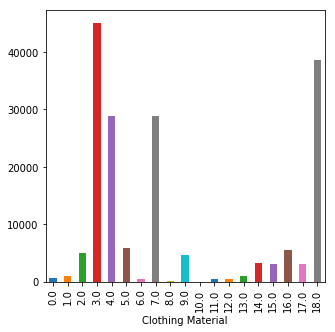

Clothing Material
0.0       586
1.0       954
2.0      5052
3.0     45039
4.0     28800
5.0      5899
6.0       471
7.0     28822
8.0       145
9.0      4612
10.0        8
11.0      415
12.0      465
13.0      943
14.0     3219
15.0     3012
16.0     5467
17.0     3050
18.0    38540
Name: title, dtype: int64

In [18]:
fig = plt.figure(figsize = (5,5))
fashion_cm.groupby(['Clothing Material'])['title'].count().plot.bar(ylim = 0)
plt.show()
fashion_cm.groupby('Clothing Material')['title'].count()

In [19]:
#MultinomialNB

y = fashion_cm['Clothing Material']
X = fashion_cm['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.81
#low accuracy and recall for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.87
#high accuracy and recall for minority group

#RandomForestClassifier
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.85
#high accuracy and recall for minority group  

#Conclusion: linearSVC and RandomForest have comparable accuracy but RandomForest has recall for all minority group.

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.97      0.13      0.23       239
        1.0       0.99      0.28      0.43       378
        2.0       0.92      0.79      0.85      2017
        3.0       0.88      0.98      0.93     17872
        4.0       0.86      0.93      0.89     11435
        5.0       0.97      0.80      0.88      2335
        6.0       1.00      0.21      0.35       176
        7.0       0.57      0.75      0.65     11707
        8.0       1.00      0.02      0.04        56
        9.0       0.96      0.83      0.89      1840
       10.0       0.00      0.00      0.00         3
       11.0       1.00      0.01      0.01       167
       12.0       1.00      0.02      0.04       177
       13.0       0.97      0.16      0.27       364
       14.0       0.96      0.55      0.70      1319
       15.0       0.93      0.70      0.80      1207
       16.0       0.82      0.76      0.79      2204
       17.0       0.92      0.

C:\Users\gayus\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC
             precision    recall  f1-score   support

        0.0       0.98      0.87      0.92       239
        1.0       0.97      0.85      0.90       378
        2.0       0.99      0.96      0.98      2017
        3.0       0.99      0.97      0.98     17872
        4.0       0.99      0.93      0.96     11435
        5.0       0.98      0.92      0.95      2335
        6.0       0.94      0.66      0.78       176
        7.0       0.62      0.78      0.69     11707
        8.0       0.97      0.64      0.77        56
        9.0       0.98      0.90      0.94      1840
       10.0       1.00      0.33      0.50         3
       11.0       0.82      0.45      0.58       167
       12.0       0.85      0.32      0.46       177
       13.0       0.92      0.77      0.84       364
       14.0       0.94      0.70      0.80      1319
       15.0       0.98      0.90      0.94      1207
       16.0       0.94      0.79      0.86      2204
       17.0       0.98      0.93   

In [20]:
A = fashion_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_test_rf = algo_rf.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_rf])
new=(df_from_arr.T)
new_1=new.rename({0:'Clothing Material'}, axis='columns')
fashion_test_4=pd.concat([fashion_test_3, new_1], axis=1)
fashion_test_4

,itemid,title,image_path,Pattern,Collar Type,Fashion Trend,Clothing Material
0,381034175,fashion wanita cardigan drape terbuka lengan p...,new_fashion_image/9ba6bf09ae89c2b9069faf569e7a...,5.0,8.0,6.0,3.0
1,396355150,bayar di tempat fashion wanita fg sweater hood...,new_fashion_image/f465cd2e55352e3ed9ab49b16257...,6.0,1.0,7.0,18.0
2,592583745,bayar di tempat cardigan sweater model lengan ...,new_fashion_image/18d709b8be0d8385689bbf5e0ab2...,6.0,8.0,10.0,7.0
3,721929368,blazer lengan panjang slim warna polos dengan ...,new_fashion_image/5c861844f6e497f0a56b8e37138c...,6.0,8.0,10.0,7.0
4,800794259,sweater rajut longgar lengan panjang warna polos,new_fashion_image/13fbe2dcbaa567939acf708d6d8e...,6.0,3.0,10.0,7.0
5,959172548,blazer kerah lapel lengan panjang dengan saku ...,new_fashion_image/3ca9d6f525ae21e0a966b63fae5c...,18.0,0.0,1.0,18.0
6,962038495,jaket lace lengan panjang slim motif bunga unt...,new_fashion_image/ae812b232c3c7fdde11505cf534a...,2.0,3.0,10.0,3.0
7,1029774483,eileen elisa sexy tombol sweater wanita pullov...,new_fashion_image/b4fd3bc71c0ebd90c977100715f5...,18.0,8.0,7.0,18.0
8,1067777027,bayar di tempat kaos t shirt dengan hoodie dan...,new_fashion_image/275e82c90f97aee1912cf64a597c...,14.0,1.0,6.0,7.0
9,1270302483,sweater kaos pullover crew neck lengan panjang...,new_fashion_image/2d8de1e482ac11ba44a3f3818bf9...,18.0,3.0,6.0,18.0


# 5. Sleeves

In [21]:
s = ['title', 'Sleeves']
fashion_s = fashion[s]

#remove missing values
fashion_s = fashion_s[pd.notnull(fashion_s['Sleeves'])]
fashion_s = fashion_s[['title', 'Sleeves']].sort_values('Sleeves')
fashion_s_id = dict(fashion_s.values)
fashion_s.shape

(177903, 2)

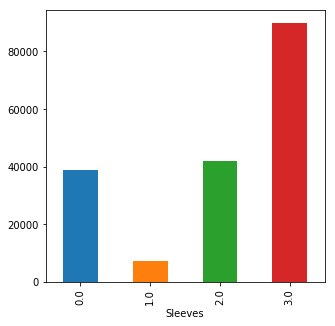

Sleeves
0.0    39021
1.0     7172
2.0    41850
3.0    89860
Name: title, dtype: int64

In [22]:
fig = plt.figure(figsize = (5,5))
fashion_s.groupby(['Sleeves'])['title'].count().plot.bar(ylim = 0)
plt.show()
fashion_s.groupby('Sleeves')['title'].count()

In [ ]:
#MultinomialNB

y = fashion_s['Sleeves']
X = fashion_s['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state = 0)
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)
algo_nb = MultinomialNB()
algo_nb.fit(X_train,y_train)
y_pred_nb = algo_nb.predict(X_test)
print("MULTINOMIAL NB")
print(classification_report(y_test,y_pred_nb), "\n")
#print(confusion_matrix(y_test,y_pred_nb), "\n")

#accuracy 0.92
#high accuracy but low recall for minority group 

#LinearSVC
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_svc = algo_svc.predict(X_test)
print("LinearSVC")
print(classification_report(y_test,y_pred_svc), "\n")
#print(confusion_matrix(y_test,y_pred_svc), "\n")

#accuracy 0.98
#high accuracy and recall for minority group

#RandomForestClassifier
algo_rf = RandomForestClassifier(random_state =0)
algo_rf.fit(X_train,y_train)
y_pred_rf = algo_rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test,y_pred_rf), "\n")
#print(confusion_matrix(y_test,y_pred_rf))

#accuracy 0.96
#high accuracy and recall for minority group  

#Conclusion: linearSVC and RandomForest have comparable accuracy but LinearSCV has higher recall for minority group.

MULTINOMIAL NB
             precision    recall  f1-score   support

        0.0       0.87      0.95      0.91     15468
        1.0       0.80      0.12      0.20      2816
        2.0       0.95      0.91      0.93     16616
        3.0       0.93      0.97      0.95     36262

avg / total       0.92      0.92      0.91     71162
 

LinearSVC
             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98     15468
        1.0       0.90      0.88      0.89      2816
        2.0       0.98      0.98      0.98     16616
        3.0       0.99      0.99      0.99     36262

avg / total       0.98      0.98      0.98     71162
 



In [ ]:
A = fashion_test['title']
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
A_test = vectorizer_test.transform(A)
algo_svc = LinearSVC()
algo_svc.fit(X_train,y_train)
y_pred_test_svc = algo_svc.predict(A_test)
df_from_arr = pd.DataFrame(data=[y_pred_test_svc])
new=(df_from_arr.T)
new_1=new.rename({0:'Sleeves'}, axis='columns')
fashion_test_5=pd.concat([fashion_test_4, new_1], axis=1)
fashion_test_5

In [ ]:
#for model fitting, all attributes use LinearSVC except Clothing Material.
export_csv = fashion_test_5.to_csv (r'C:/Users/gayus/OneDrive/Desktop/Master Course/NDSC/fashion_data_info_val_competition_finalised.csv', index = None, header=True) 